In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

(0.0, 629.95)

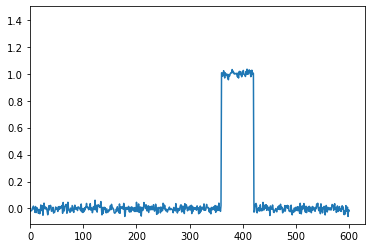

In [3]:
def noise_maker(array,start, end, noise):
    for i in range(start, end):
        array[i]= 1+ np.random.normal(scale=noise)
    return array

def create_signal(size=100, label=0, noise=0):
    assert size % 10 == 0, "Needs to be a factor of 10"
    
    position= round(size/5)
    scale= round(5 *(size/100))
    array= np.zeros(size)
    
    if noise:
        
        for i in range(size):
            array[i] += np.random.normal(scale=noise)
    else:
        array[scale-1:position+scale]=1
        array[position*4-1:size-scale]=1

        array[position*2-1:position*2+scale]=1
        array[position*3-1:position*3+scale]=1
    
    if label==0:
        array= noise_maker(array,scale-1,position+scale, noise)
        return array
    elif label==1:
        if noise:
            array= noise_maker(array,position*2-1, position*2+2*scale, noise)
        else:
            array[position*2-1:position*2+2*scale]=1
            
        return array
    elif label==2:
        if noise:
            array= noise_maker(array,position*3-1,position*3+2*scale, noise)
        else:
            array[position*3-1:position*3+2*scale]=1
        return array

array= create_signal(600, 2, 0.02)
plt.plot(range(1,len(array)+1),array)
plt.ylim(top=1.5)
plt.xlim(left=0)
# plt.xticks(range(0,120,20), ['1']+[range(1,121,20)])

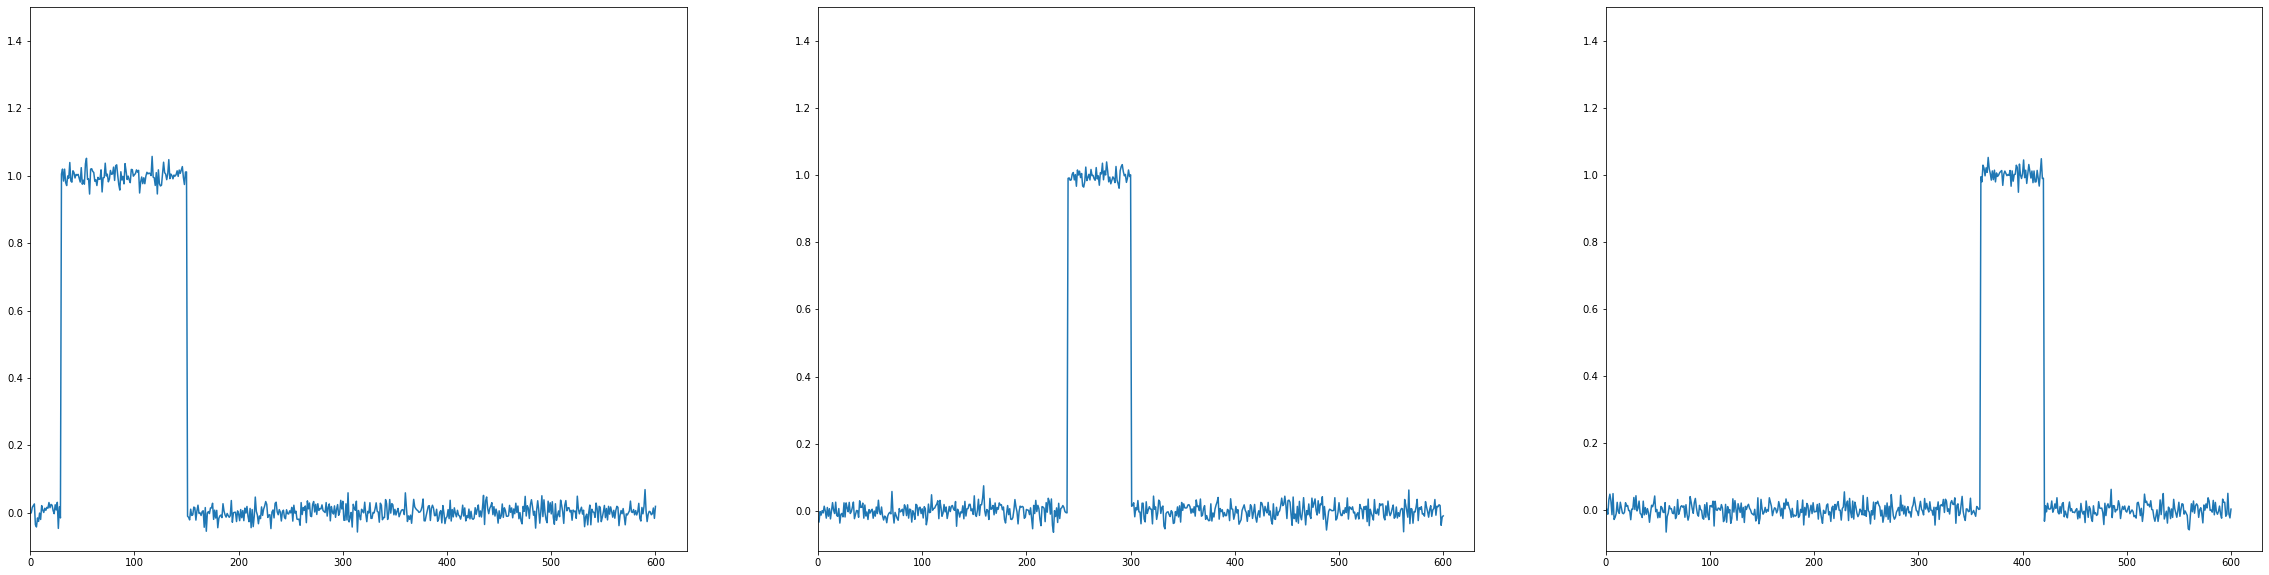

In [100]:
plt.figure(figsize=(40,10))
for i in [0,1,2]:
    plt.subplot(1,3,i+1)
    array= create_signal(600, i, 0.02)
    plt.plot(range(1,len(array)+1),array)
    plt.ylim(top=1.5)
    plt.xlim(left=0)

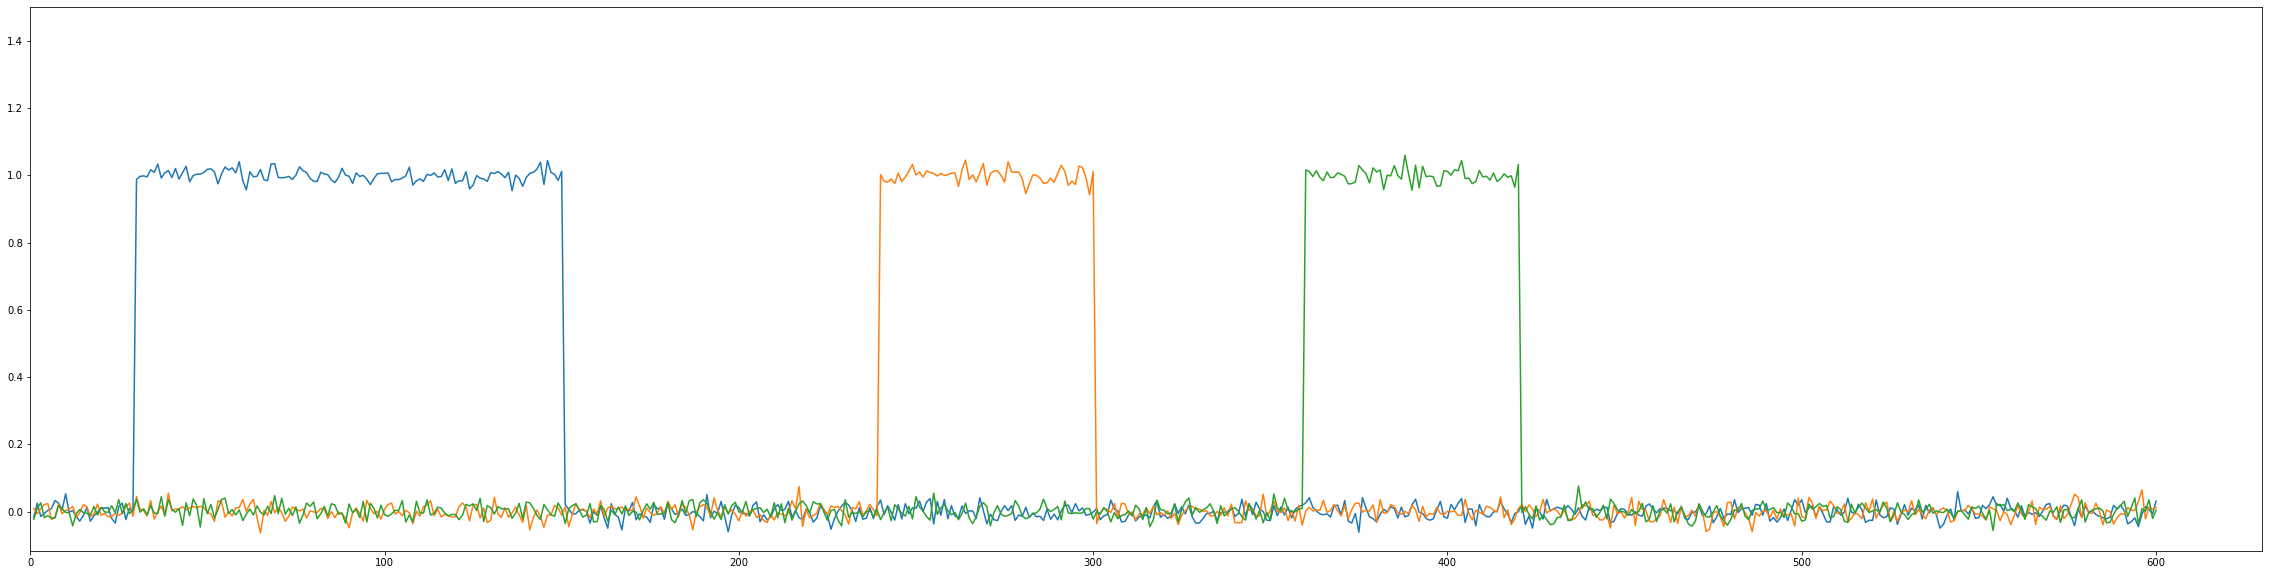

In [3]:
plt.figure(figsize=(40,10))
for i in [0,1,2]:
#     plt.subplot(1,3,i+1)
    array= create_signal(600, i, 0.02)
    plt.plot(range(1,len(array)+1),array)
    plt.ylim(top=1.5)
    plt.xlim(left=0)

## Create Dataset

In [4]:
def create_dataset(split:dict, signal_size:int, noise:float):
    dataset_X=[]
    dataset_y=[]
    
    for i in range(split[0]):
        dataset_X.append(create_signal(size=signal_size, label=0, noise=noise))
        dataset_y.append(0)
    
    for i in range(split[1]):
        dataset_X.append(create_signal(size=signal_size, label=1, noise=noise))
        dataset_y.append(1)

    for i in range(split[2]):
        dataset_X.append(create_signal(size=signal_size, label=2, noise=noise))
        dataset_y.append(2)
        
    return dataset_X, dataset_y

X,y = create_dataset({0:300,1:300,2:300}, 600, 0.02)
index= [i for i in range(len(X))]
np.random.shuffle(index)
X=np.array(X);y=np.array(y)
X=X[index];y=y[index]

split=int(len(X) *0.4)
X_train=X[split-1:]; y_train=y[split-1:]
X_test=X[:split]; y_test=y[:split]

# Graphs -- dataset0

In [3]:
import pickle

default_path= "./experiments/unisimul_study/exp_log0/"
option=0
X,y= pickle.load(open(f"{default_path}dataset{option}.pkl", "rb"))

Text(0.5, 0.98, 'Univariate Simulated Dataset 0')

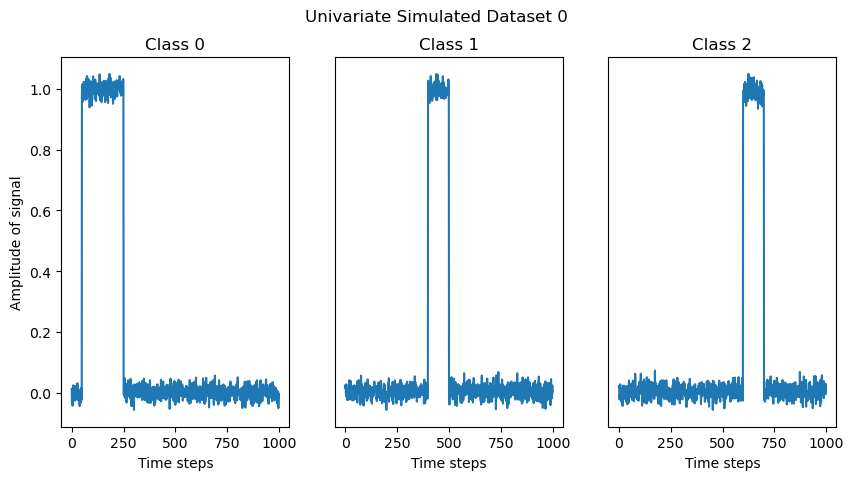

In [4]:
plt.rc("font", size=10)

fig, axes= plt.subplots(1,3)
fig.set_figwidth(10)


indices= np.unique(y, return_index=True)[1]
axis= axes[0]
index=indices[0]
class_idx=0

axis.plot(X[index])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylabel("Amplitude of signal")

for class_idx, axis, index in zip(range(1,len(axes)), axes[1:], indices[1:]):
    axis.plot(X[index])
    axis.set_xlabel("Time steps")
    axis.set_title(f"Class {class_idx}")
    axis.set_yticks([])
plt.suptitle(f"Univariate Simulated Dataset {option}")

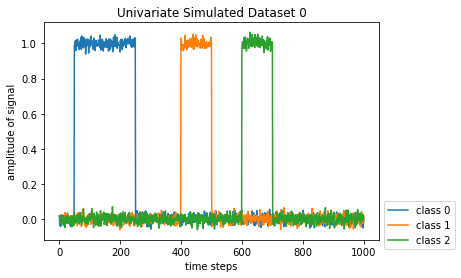

In [8]:
# plt.subplot(1,2)
plt.plot(X[0])
plt.plot(X[300])
plt.plot(X[600])
plt.xlabel("time steps")
plt.ylabel("amplitude of signal")
plt.title(f"Univariate Simulated Dataset {option}")
plt.legend(["class 0", "class 1", "class 2"], bbox_to_anchor=[1, 0.2])

In [1]:
iew_ws=[]
df_ws=[]
nfs_ws=[]

In [25]:
import pickle
from sklearn.preprocessing import MinMaxScaler
ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="DF"
epochs= 50
option=0
runs=5
for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/unisimul_study/exp_log{folder}/{original_dict[model]}/unisimul_study{option}-{model}-w-{epochs}.pkl", "rb") )
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)
    
    if model=="Weight":
        iew_ws= ws.copy()
    elif model=="DF":
        df_ws= ws.copy()
    elif model=="NFS":
        nfs_ws= ws.copy()

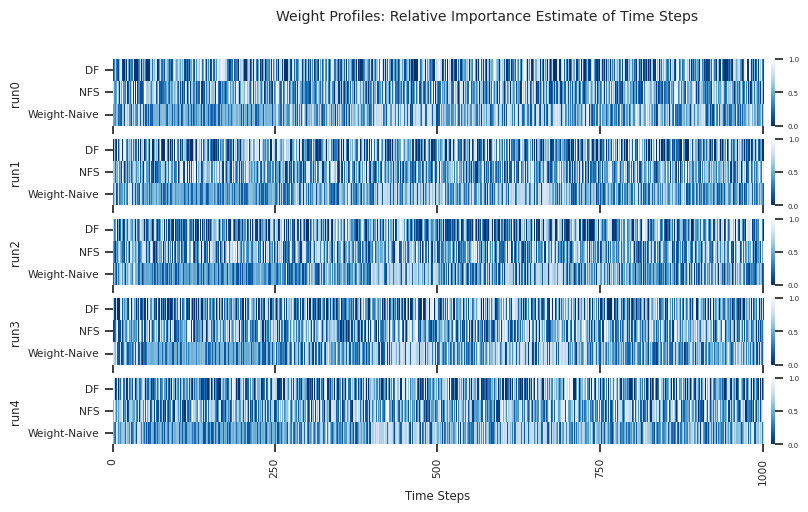

In [95]:
# Overall Weight profiles comparison plot
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= ["DF", "NFS", "Weight-Naive"]
sns.set(font_scale=0.7)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(5)
fig.set_figwidth(10)

start=0
end=start+3
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )
    ax[i].set_xticks(
        [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
        []
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 3
    end += 3

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    []
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)


ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Weight Profiles: Relative Importance Estimate of Time Steps")

fig.subplots_adjust(wspace=0, hspace=0.2)

Text(0.5, 1.0, 'DF: Relative Importance Estimate of Time Steps')

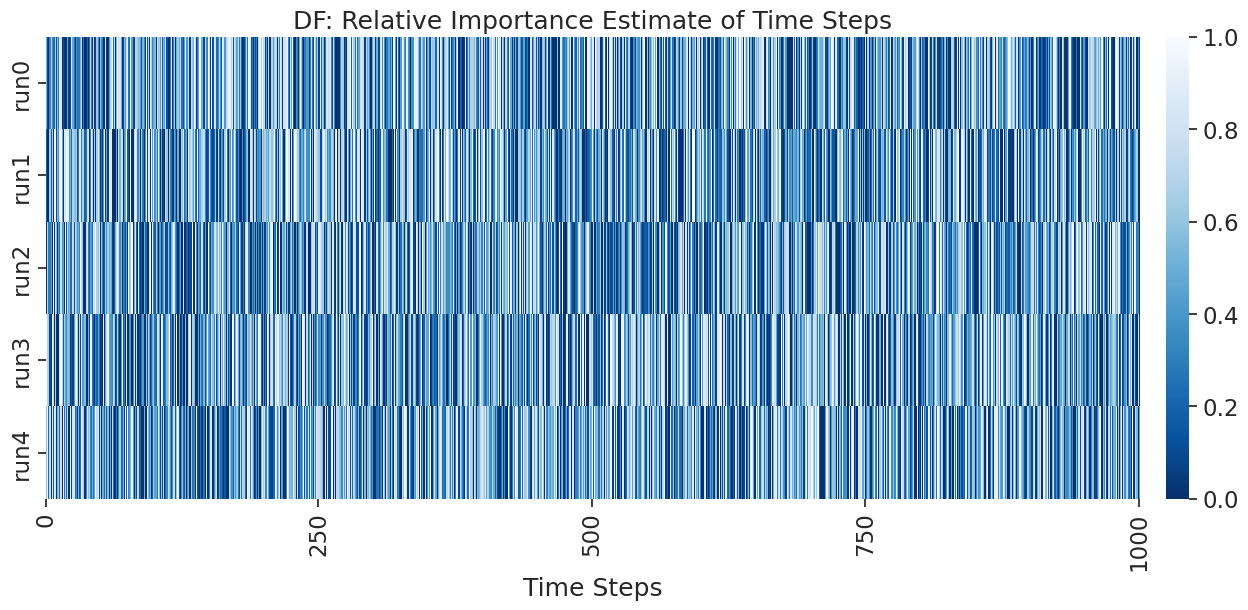

In [96]:
# Specific weight profile graph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] # ["channel0","channel1","channel2"]
y_labels= [f"run{i}" for i in range(runs)]
sns.set(font_scale=1.5)
plt.figure(figsize=(17,6))
ax= sns.heatmap(
    pd.DataFrame(ws),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",
    cbar_kws={"pad":0.02},
)
ax.set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax.tick_params(left=True, bottom=True)
plt.xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
plt.title(model+": Relative Importance Estimate of Time Steps")

In [26]:
import pandas as pd
from utilities.subset_func import return_epoch_stat
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pickle

channels= [i for i in range(1000)]
epochs=50
option=0
model="Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
    
grad_auc_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.00041057 0.00063867 0.01026288 0.15638026]
[0.00032374 0.00052094 0.00503553 0.11682475]
[0.00031257 0.00052711 0.00677957 0.14572081]
[0.00034555 0.00053846 0.00646816 0.15836754]
[0.00035932 0.0005648  0.00770626 0.16615679]


In [27]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(1000)]
epochs=50
option=0
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
    
grad_roc_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.00045971 0.00065626 0.03936166 0.17173637]
[0.00037111 0.00056806 0.027967   0.13926   ]
[0.00037073 0.0005801  0.03848251 0.15949786]
[0.00037354 0.00056586 0.0365423  0.16536705]
[0.00038578 0.00057887 0.0418942  0.1861351 ]


In [28]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(1000)]
epochs=50
option=0
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.0003306  0.00044047 0.00075596 0.11454877]
[0.00027064 0.00036694 0.00068178 0.09224236]
[0.0002943  0.00038798 0.00068726 0.09889709]
[0.00026253 0.00037197 0.00065086 0.0794378 ]
[0.00029204 0.00038743 0.0006731  0.11841827]


Text(0.5, 24.249999999999986, 'Time Steps')

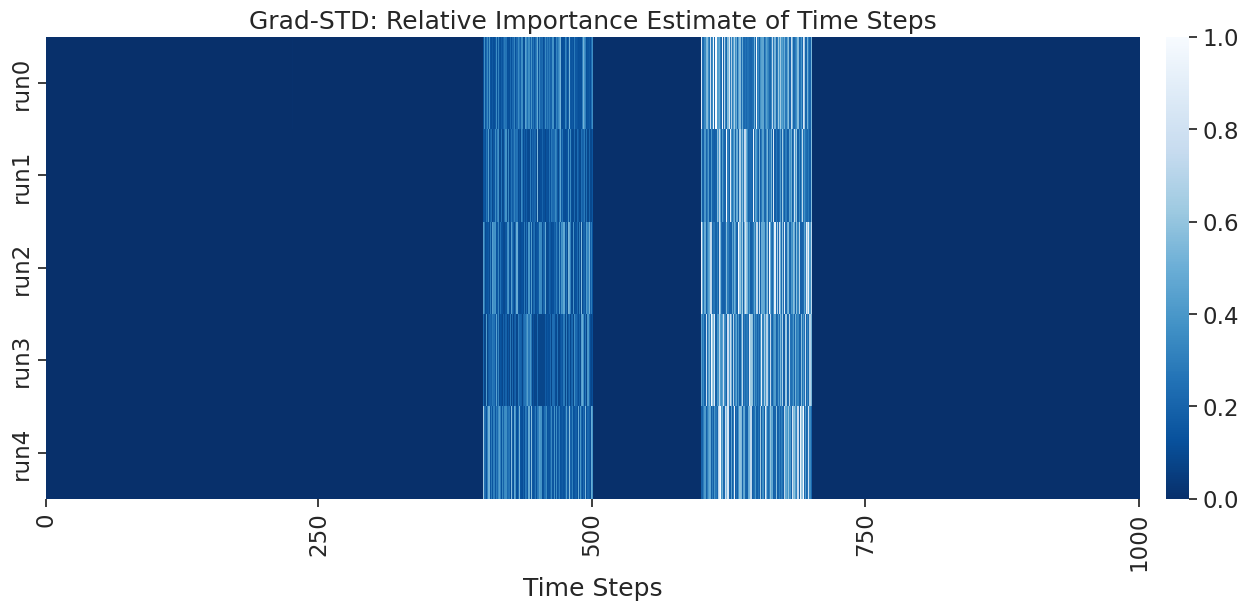

In [14]:
# Specific gradient based profile graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))

sns.set(font_scale=1.5)
ax= sns.heatmap(
    pd.DataFrame(folder_dictionary),
    yticklabels=[f"run{i}" for i in range(runs)],
    annot=False, cmap="Blues_r",
    cbar_kws={"pad":0.02}
)

ax.set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax.tick_params(left=True, bottom=True)
plt.title(model+": Relative Importance Estimate of Time Steps")
plt.xlabel("Time Steps")

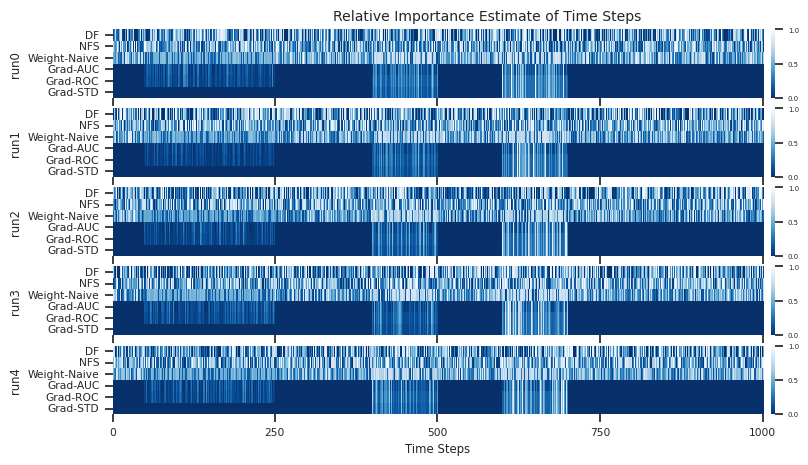

In [29]:
# Comparison plot with all methods
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    grad_auc_gs[0],
    grad_roc_gs[0],
    grad_std_gs[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    grad_auc_gs[1],
    grad_roc_gs[1],
    grad_std_gs[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    grad_auc_gs[2],
    grad_roc_gs[2],
    grad_std_gs[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    grad_auc_gs[3],
    grad_roc_gs[3],
    grad_std_gs[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
    grad_auc_gs[4],
    grad_roc_gs[4],
    grad_std_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] # ["channel0","channel1","channel2"]
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]#[f"run{i}" for i in range(runs)]
sns.set(font_scale=0.7)
aspect=15
fig, ax = plt.subplots(5,1)
fig.set_figheight(5)
fig.set_figwidth(10)

start=0
end=start+6
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks(
        [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
        []
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    []
)
ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)
ax[-1].tick_params(axis='x', labelrotation=0)

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax[-1].set_xlabel("Time Steps")

fig.suptitle("Relative Importance Estimate of Time Steps",y=0.92)

fig.subplots_adjust(wspace=0, hspace=0.15)
# plt.tight_layout()

# Graphs -- dataset1

In [5]:
import pickle

default_path= "./experiments/unisimul_study/exp_log0/"
option=1
X,y= pickle.load(open(f"{default_path}dataset{option}.pkl", "rb"))

Text(0.5, 0.98, 'Univariate Simulated Dataset 1')

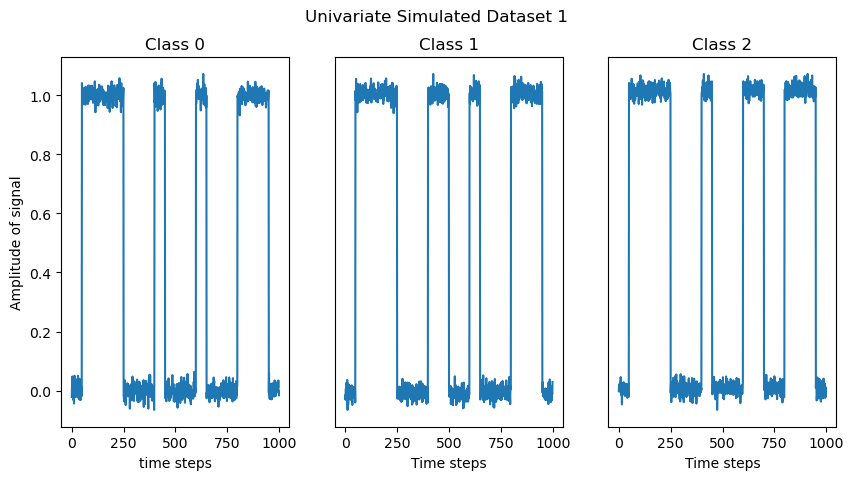

In [6]:
plt.rc("font", size=10)

fig, axes= plt.subplots(1,3)
fig.set_figwidth(10)

indices= np.unique(y, return_index=True)[1]
axis= axes[0]
index=indices[0]
class_idx=0

axis.plot(X[index])
axis.set_xlabel("time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylabel("Amplitude of signal")

for class_idx, axis, index in zip(range(1,len(axes)), axes[1:], indices[1:]):
    axis.plot(X[index])
    axis.set_xlabel("Time steps")
    axis.set_title(f"Class {class_idx}")
    axis.set_yticks([])
plt.suptitle(f"Univariate Simulated Dataset {option}")

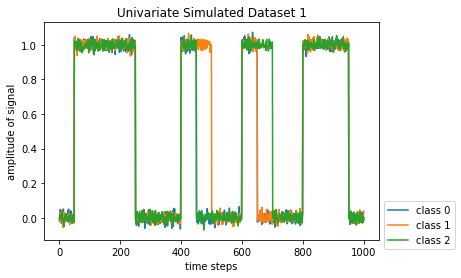

In [45]:
plt.plot(X[0])
plt.plot(X[300])
plt.plot(X[600])
plt.xlabel("time steps")
plt.ylabel("amplitude of signal")
plt.title(f"Univariate Simulated Dataset {option}")
plt.legend(["class 0", "class 1", "class 2"], bbox_to_anchor=[1, 0.2])

In [21]:
import pickle
from sklearn.preprocessing import MinMaxScaler
ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="Weight"
epochs= 50
option=1
runs=5

for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/unisimul_study/exp_log{folder}/{original_dict[model]}/unisimul_study{option}-{model}-w-{epochs}.pkl", "rb") )
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)


    if model=="Weight":
        iew_ws= ws.copy()
    elif model=="DF":
        df_ws= ws.copy()
    elif model=="NFS":
        nfs_ws= ws.copy()

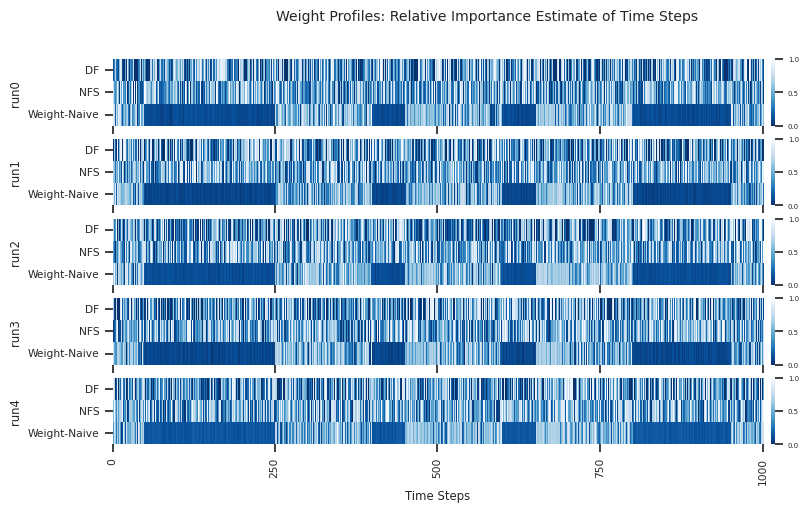

In [98]:
# Overall Weight profiles comparison plot
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))]
y_labels= ["DF", "NFS", "Weight-Naive"]
sns.set(font_scale=0.7)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(5)
fig.set_figwidth(10)

start=0
end=start+3
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
           yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks(
        [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
        []
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 3
    end += 3

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    []
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)

ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Weight Profiles: Relative Importance Estimate of Time Steps", y=0.92)

fig.subplots_adjust(wspace=0, hspace=0.2)
# plt.tight_layout()

Text(0.5, 1.0, 'Weight-Naive: Relative Importance Estimate of Time Steps')

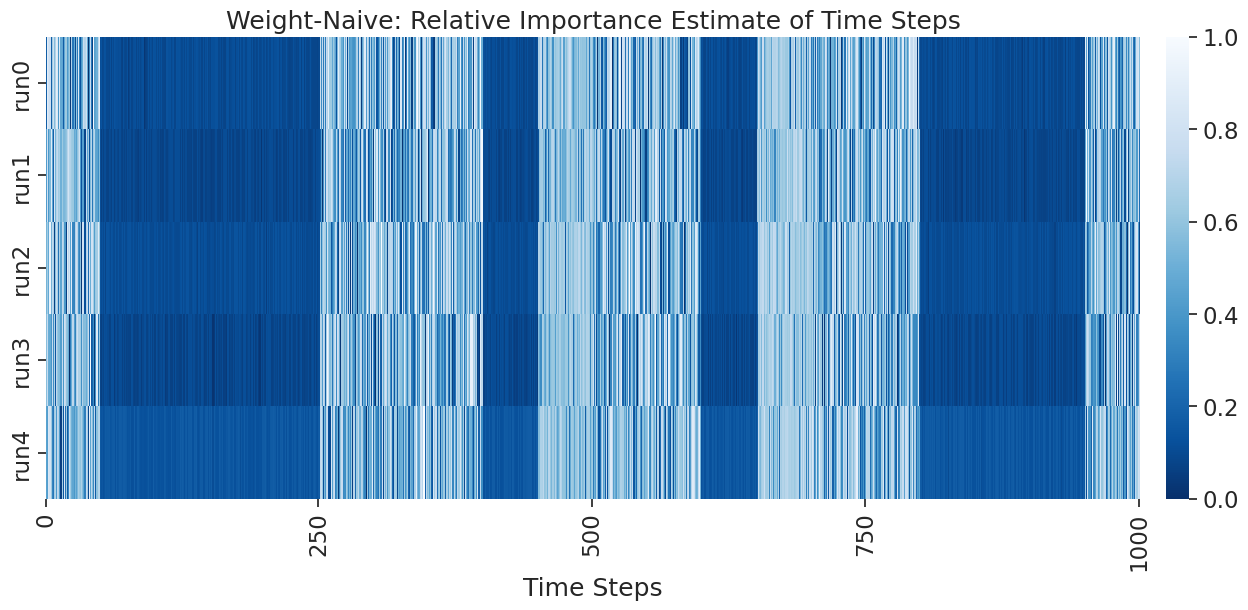

In [5]:
# Specific weight profile graph
import seaborn as sns
import pandas as pd

x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= [f"run{i}" for i in range(runs)]
plt.figure(figsize=(17,6))
sns.set(font_scale=1.5)
ax= sns.heatmap(
    pd.DataFrame(ws), 
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",
    cbar_kws={"pad":0.02}
)
ax.set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax.tick_params(left=True, bottom=True)
plt.xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
plt.title(model+": Relative Importance Estimate of Time Steps")

In [15]:
from utilities.subset_func import return_epoch_stat
from sklearn.preprocessing import MinMaxScaler
import pickle

channels= [i for i in range(1000)]
epochs=50
option=1
model="Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_auc_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.00111107 0.0022054  0.01338635 0.0345083 ]
[0.00116396 0.00198796 0.01244704 0.0342619 ]
[0.00098258 0.00185648 0.00997914 0.02671033]
[0.00113103 0.00219202 0.01115138 0.02374568]
[0.00105512 0.00209901 0.01076334 0.02435735]


In [16]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels= [i for i in range(1000)]
epochs=50
option=1
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.0014368  0.00250234 0.03811467 0.09163385]
[0.00140109 0.00231447 0.04001917 0.0732799 ]
[0.00121835 0.00223244 0.03330869 0.06026475]
[0.00131064 0.00254511 0.04538744 0.09191489]
[0.00125388 0.00238123 0.04779673 0.08855657]


In [17]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels= [i for i in range(1000)]# ['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
epochs=50
option=1
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/unisimul_study/exp_log{folder}/Grad/list/unisimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_gs=pd.DataFrame(folder_dictionary).to_numpy()

[0.00078903 0.00142638 0.18200274 0.34828831]
[0.00077226 0.00145791 0.15558241 0.29499209]
[0.00073013 0.00124909 0.15399127 0.27612698]
[0.00083988 0.0014929  0.16257062 0.29201202]
[0.00073934 0.00142877 0.16835466 0.32037854]


Text(0.5, 24.249999999999986, 'Time Steps')

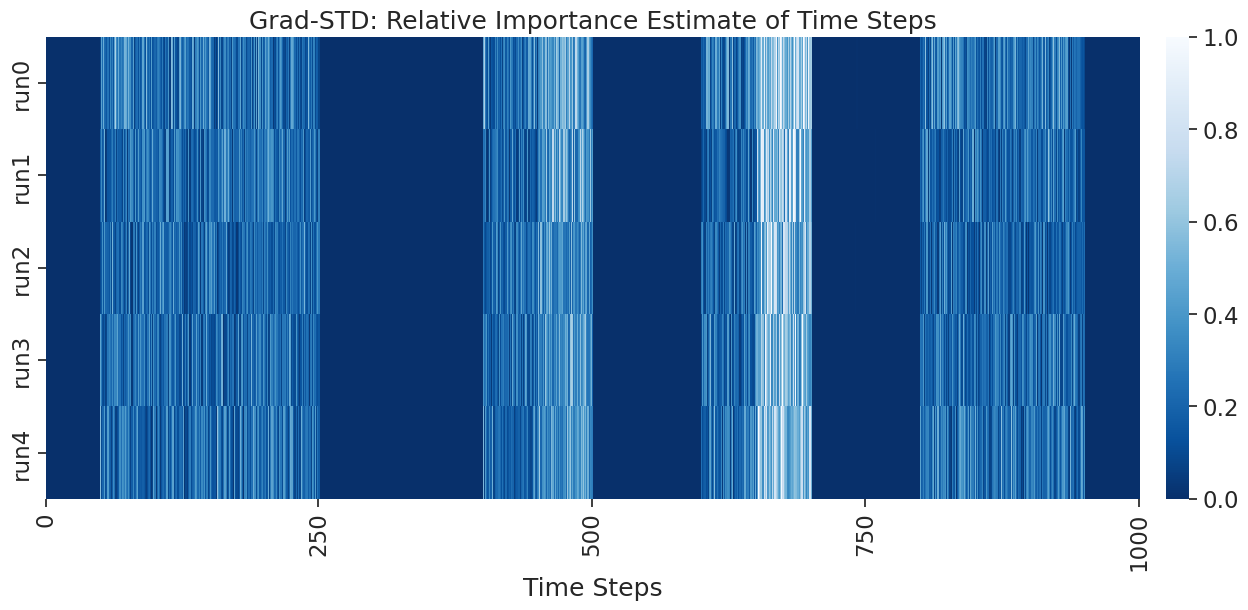

In [32]:
# Specific gradient based profile graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.set(font_scale=1.5)
ax= sns.heatmap(
    pd.DataFrame(folder_dictionary),
    yticklabels=[f"run{i}" for i in range(runs)],
    annot=False, cmap="Blues_r",
    cbar_kws={"pad":0.02}
)

ax.set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)

ax.tick_params(left=True, bottom=True)
plt.title(model+": Relative Importance Estimate of Time Steps")
plt.xlabel("Time Steps")

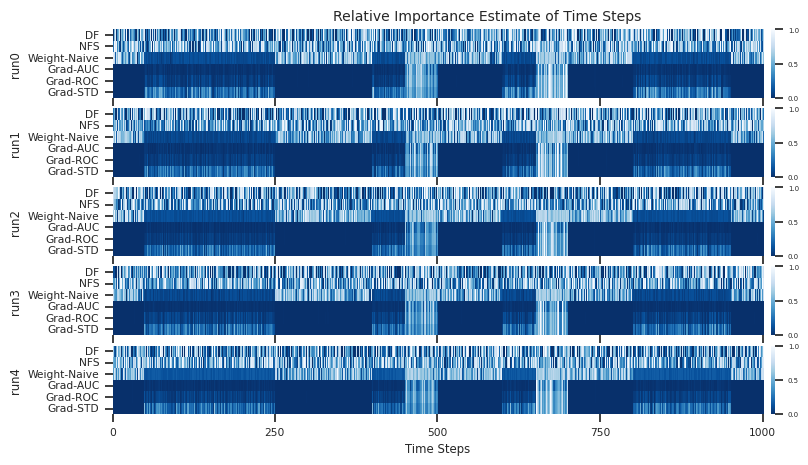

In [22]:
# Overall comparison plot between all methods
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    grad_auc_gs[0],
    grad_roc_gs[0],
    grad_std_gs[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    grad_auc_gs[1],
    grad_roc_gs[1],
    grad_std_gs[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    grad_auc_gs[2],
    grad_roc_gs[2],
    grad_std_gs[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    grad_auc_gs[3],
    grad_roc_gs[3],
    grad_std_gs[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
    grad_auc_gs[4],
    grad_roc_gs[4],
    grad_std_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]
sns.set(font_scale=0.7)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(5)
fig.set_figwidth(10)

start=0
end=start+6
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )
    ax[i].set_xticks(
        [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
        []
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    []
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)
ax[-1].tick_params(axis='x', labelrotation=0)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999],
    [0]+[i for i in range(0,1000,250)][1:]+[1000]
)
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Relative Importance Estimate of Time Steps",y=0.92)

fig.subplots_adjust(wspace=0, hspace=0.15)
# plt.tight_layout()